# SBA National Loan Analysis

# Modeling - Part 1 - Logistic Regression

## Table of Contents

1. Imports
2. Previewing Data
3. Preprocessing Data
    1. Standard Scaler
    2. Robust Scaler
4. Evaluation Metrics
5. Simple Model
    1. Standard Scaler
    2. Robust Scaler
6. Grid Search
    1. Standard Scaler
    2. Robust Scaler
7. Bayesian Optimization
    1. Standard Scaler
    2. Robust Scaler
8. Save Results
    
    

## 1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.linear_model import LogisticRegression

from library.preprocessing import processing_pipeline
from library.modeling import (createModel, createClassificationMetrics, runGridSearchAnalysis, 
                              createConfusionMatrix, appendModelingResults, drawRocCurve, obtain_best_bayes_model)

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [3]:
f = open('./results/best_params.json')
data = json.load(f)
best_model_params = dict(data)

## 2. Previewing Data

In [4]:
sba_loans = pd.read_csv('./../data/processed/sba_national_processed_final.csv')

In [5]:
sba_loans.head()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,GrAppv,SBA_Appv,NAICS_sectors,unemployment_rate,gdp_growth,gdp_annual_change,inflation_rate,inf_rate_annual_chg,NewExist_existing_business,NewExist_new_business,UrbanRural_rural,UrbanRural_urban,isFranchise_not_franchise,RevLineCr_v2_N,RevLineCr_v2_Y,LowDoc_v2_N,LowDoc_v2_Y,MIS_Status_v2_default,state_top10
0,84,4,0,0,60000.0,60000.0,48000.0,45,3.5,4.4472,0.67,2.3377,-0.59,0,1,0,0,1,1,0,0,1,0,0
1,60,2,0,0,40000.0,40000.0,32000.0,72,3.5,4.4472,0.67,2.3377,-0.59,0,1,0,0,1,1,0,0,1,0,0
2,180,7,0,0,287000.0,287000.0,215250.0,62,3.5,4.4472,0.67,2.3377,-0.59,1,0,0,0,1,1,0,1,0,0,0
3,60,2,0,0,35000.0,35000.0,28000.0,0,4.1,4.4472,0.67,2.3377,-0.59,1,0,0,0,1,1,0,0,1,0,0
4,240,14,7,7,229000.0,229000.0,229000.0,0,4.8,4.4472,0.67,2.3377,-0.59,1,0,0,0,1,1,0,1,0,0,1


## 3. Preprocessing Data

In [6]:
target = 'MIS_Status_v2_default'

### A. Standard Scaler

In [7]:
X_train_ss, X_test_ss, y_train_ss, y_test_ss = processing_pipeline(sba_loans, target)

### B. Robust Scaler

In [8]:
X_train_rs, X_test_rs, y_train_rs, y_test_rs = processing_pipeline(sba_loans, target, scaler='Robust')

## 4. Evaluation Metrics

The following evlaution metrics will be used to evaluate the effectiveness of the logistic models.

**Accuracy Score**

Blurb about accuracy score.

**Classifiation Report**

Blurb about Classification Report

**Matthew's Correlation Coefficient**

Blurb about MCC

**F1 Score**

Blurb about F1 Score and why it will be the main metric for evaluation

## 5. Simple Model

### A. Standard Scaler

In [9]:
logreg_mod1 = LogisticRegression(random_state = 42)
y_pred = createModel(logreg_mod1, X_train_ss, y_train_ss, X_test_ss)

In [10]:
metrics = createClassificationMetrics(y_pred, y_test_ss)

In [11]:
print('Accuracy Score: ' + str(round(metrics['acc'], 4)))

Accuracy Score: 0.8488


In [12]:
print('Classification Report: \n' + metrics['cr'])

Classification Report: 
              precision    recall  f1-score   support

        paid       0.97      0.86      0.91    251315
     default       0.25      0.68      0.37     17539

    accuracy                           0.85    268854
   macro avg       0.61      0.77      0.64    268854
weighted avg       0.93      0.85      0.88    268854



In [13]:
print('Matthew\'s Correlation Coefficient: ' + str(round(metrics['mcc'],4)))

Matthew's Correlation Coefficient: 0.3524


In [14]:
print('F1 Score: ' + str(round(metrics['f1'], 4)))

F1 Score: 0.3704


### B. Robust Scaler

In [15]:
logreg_rs_mod1 = LogisticRegression(random_state = 42)
y_pred = createModel(logreg_rs_mod1, X_train_rs, y_train_rs, X_test_rs)

In [16]:
metrics = createClassificationMetrics(y_pred, y_test_rs)

In [17]:
print('Accuracy Score: ' + str(round(metrics['acc'], 4)))

Accuracy Score: 0.8457


In [18]:
print('Classification Report: \n' + metrics['cr'])

Classification Report: 
              precision    recall  f1-score   support

        paid       0.98      0.86      0.91    252905
     default       0.23      0.67      0.34     15949

    accuracy                           0.85    268854
   macro avg       0.60      0.76      0.63    268854
weighted avg       0.93      0.85      0.88    268854



In [19]:
print('Matthew\'s Correlation Coefficient: ' + str(round(metrics['mcc'],4)))

Matthew's Correlation Coefficient: 0.3295


In [20]:
print('F1 Score: ' + str(round(metrics['f1'], 4)))

F1 Score: 0.3411


## 6. Grid Search Cross Validation

In [21]:
model_results = []

In [22]:
param_grid = {
    'C': [0.001, 0.1, 1, 10, 100],
    'penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'fit_intercept': [True, False],
    'solver': ['saga']
}

### A. Standard Scaler

In [23]:
mod_info = {
    'model': 'Logistic Regression',
    'method': 'Grid Search',
    'scaler': 'Standard'
}

In [24]:
lgr = LogisticRegression(random_state=42)
lgr_ss_best_params, y_pred = runGridSearchAnalysis(lgr, param_grid, X_train_ss, y_train_ss, X_test_ss)

**Evaluation Metrics**

In [25]:
metrics = createClassificationMetrics(y_pred, y_test_ss)
print('Accuracy Score: {}'.format(metrics['acc']))
print('Classification Report: \n{}'.format(metrics['cr']))
print('Matthew\'s Correlation Coefficient: {}'.format(metrics['mcc']))
print('F1 Score: {}'.format(metrics['f1']))

Accuracy Score: 0.5609810529134772
Classification Report: 
              precision    recall  f1-score   support

        paid       0.49      0.95      0.65    114369
     default       0.89      0.27      0.41    154485

    accuracy                           0.56    268854
   macro avg       0.69      0.61      0.53    268854
weighted avg       0.72      0.56      0.51    268854

Matthew's Correlation Coefficient: 0.2915600807633472
F1 Score: 0.41419836417057104


**Confusion Matrix**

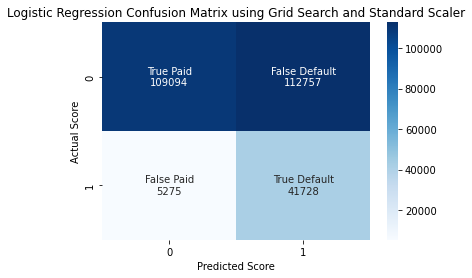

In [26]:
matrix = createConfusionMatrix(y_test_ss, y_pred, mod_info)

**ROC Curve**

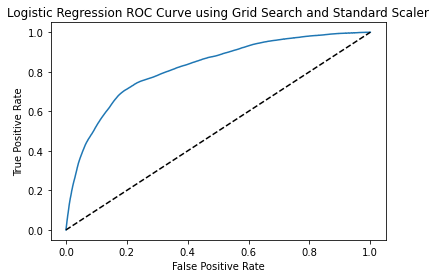

In [27]:
roc_mod = LogisticRegression(**lgr_ss_best_params, random_state=42)
metrics['auc'] = drawRocCurve(roc_mod, X_train_ss, X_test_ss, y_train_ss, y_test_ss, mod_info)

In [28]:
print(metrics['auc'])

0.8210549627477958


**Append Results**

In [29]:
model_results, best_model_params = appendModelingResults(model_results, best_model_params, mod_info,
                                                         lgr_ss_best_params, matrix, metrics)

### B. Robust Scaler

In [30]:
mod_info = {
    'model': 'Logistic Regression',
    'method': 'Grid Search',
    'scaler': 'Robust'
}

In [31]:
lgr = LogisticRegression(random_state=42)
lgr_gs_rs_params, y_pred = runGridSearchAnalysis(lgr, param_grid, X_train_rs, y_train_rs, X_test_rs)

**Evaluation Metrics**

In [32]:
metrics = createClassificationMetrics(y_pred, y_test_rs)
print('Accuracy Score: {}'.format(metrics['acc']))
print('Classification Report: \n{}'.format(metrics['cr']))
print('Matthew\'s Correlation Coefficient: {}'.format(metrics['mcc']))
print('F1 Score: {}'.format(metrics['f1']))


Accuracy Score: 0.8147061230258802
Classification Report: 
              precision    recall  f1-score   support

        paid       0.90      0.88      0.89    225842
     default       0.43      0.47      0.45     43012

    accuracy                           0.81    268854
   macro avg       0.66      0.67      0.67    268854
weighted avg       0.82      0.81      0.82    268854

Matthew's Correlation Coefficient: 0.33603413455619535
F1 Score: 0.4465700161084264


**Confusion Matrix**

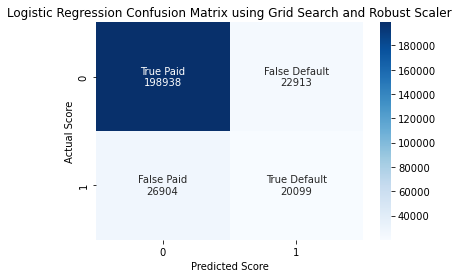

In [33]:
matrix = createConfusionMatrix(y_test_rs, y_pred, mod_info)

**ROC Curve**

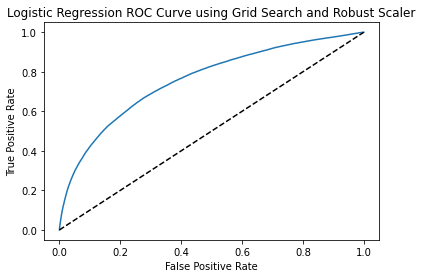

In [34]:
roc_mod = LogisticRegression(**lgr_gs_rs_params, random_state=42)
metrics['auc'] = drawRocCurve(roc_mod, X_train_rs, X_test_rs, y_train_rs, y_test_rs, mod_info)

In [35]:
print(metrics['auc'])

0.7582424485653568


**Append Results**

In [36]:
model_results, best_model_params = appendModelingResults(model_results, best_model_params, mod_info,
                                                          lgr_gs_rs_params, matrix, metrics)

## 7. Bayesian Optimization

**Constants**

In [37]:
dg = {
    'penalty': ['none', 'l1', 'l2'],
    'fit_intercept': [True, False],
}
c = {
    'solver': 'saga'
}
ss = {
    "C": (0.001, 100),
    "fit_intercept": (0, 1),
    "penalty": (0, 2)
}

### Standard Scaler

In [38]:
mod_info = {
    'model': 'Logistic Regression',
    'method': 'Bayesian Optimization',
    'scaler': 'Standard'
}

In [39]:
lgr_bo_ss_params = obtain_best_bayes_model(LogisticRegression, X_train_ss, y_train_ss, dg, ss, c)

|   iter    |  target   |     C     | fit_in... |  penalty  |
-------------------------------------------------------------
|  1        |  0.4135   |  37.45    |  0.9507   |  1.464    |
|  2        |  0.368    |  59.87    |  0.156    |  0.312    |
|  3        |  0.4135   |  5.809    |  0.8662   |  1.202    |
|  4        |  0.368    |  70.81    |  0.02058  |  1.94     |
|  5        |  0.368    |  83.24    |  0.2123   |  0.3636   |
|  6        |  0.368    |  22.12    |  0.0      |  0.0      |
|  7        |  0.4135   |  36.42    |  0.7833   |  1.209    |
|  8        |  0.3251   |  0.001    |  0.0      |  2.0      |
|  9        |  0.4135   |  8.919    |  1.0      |  0.7504   |
|  10       |  0.368    |  42.84    |  0.0      |  0.0      |
|  11       |  0.4135   |  31.57    |  1.0      |  2.0      |
|  12       |  0.368    |  13.6     |  0.0      |  2.0      |
|  13       |  0.368    |  28.76    |  0.006158 |  0.02643  |
|  14       |  0.4135   |  33.43    |  0.5242   |  0.01332  |
|  15   

In [40]:
lgr_bo_ss_mod1 = LogisticRegression(**lgr_bo_ss_params, random_state=42)
y_pred = createModel(lgr_bo_ss_mod1, X_train_ss, y_train_ss, X_test_ss)

**Evaluation Metrics**

In [41]:
metrics = createClassificationMetrics(y_pred, y_test_ss)
print('Accuracy Score: {}'.format(metrics['acc']))
print('Classification Report: \n{}'.format(metrics['cr']))
print('Matthew\'s Correlation Coefficient: {}'.format(metrics['mcc']))
print('F1 Score: {}'.format(metrics['f1']))

Accuracy Score: 0.5609810529134772
Classification Report: 
              precision    recall  f1-score   support

        paid       0.49      0.95      0.65    114369
     default       0.89      0.27      0.41    154485

    accuracy                           0.56    268854
   macro avg       0.69      0.61      0.53    268854
weighted avg       0.72      0.56      0.51    268854

Matthew's Correlation Coefficient: 0.2915600807633472
F1 Score: 0.41419836417057104


**Confusion Matrix**

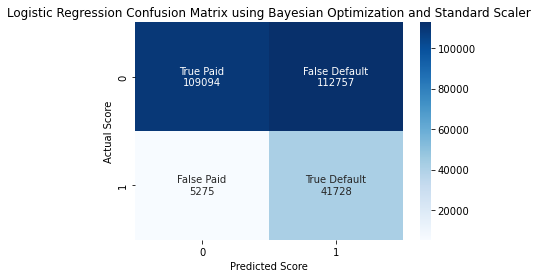

In [42]:
matrix = createConfusionMatrix(y_test_ss, y_pred, mod_info)

**ROC Curve**

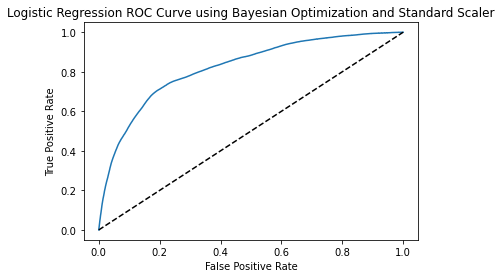

In [43]:
metrics['auc'] = drawRocCurve(lgr_bo_ss_mod1, X_train_ss, X_test_ss, y_train_ss, y_test_ss, mod_info)

**Append Results**

In [44]:
model_results, best_model_params = appendModelingResults(model_results, best_model_params, mod_info,
                                                          lgr_bo_ss_params, matrix, metrics)

### B. Robust Scaler

In [45]:
mod_info = {
    'model': 'Logistic Regression',
    'method': 'Bayesian Optimization',
    'scaler': 'Robust'
}

In [46]:
lgr_bo_rs_params = obtain_best_bayes_model(LogisticRegression, X_train_rs, y_train_rs, dg, ss, c)

|   iter    |  target   |     C     | fit_in... |  penalty  |
-------------------------------------------------------------
|  1        |  0.448    |  37.45    |  0.9507   |  1.464    |
|  2        |  0.1386   |  59.87    |  0.156    |  0.312    |
|  3        |  0.448    |  5.809    |  0.8662   |  1.202    |
|  4        |  0.1386   |  70.81    |  0.02058  |  1.94     |
|  5        |  0.1386   |  83.24    |  0.2123   |  0.3636   |
|  6        |  0.1386   |  22.12    |  0.0      |  0.0      |
|  7        |  0.448    |  38.51    |  0.7486   |  1.444    |
|  8        |  0.1381   |  0.001    |  0.0      |  2.0      |
|  9        |  0.448    |  9.915    |  1.0      |  0.0      |
|  10       |  0.448    |  46.34    |  1.0      |  0.0      |
|  11       |  0.448    |  99.99    |  0.9861   |  1.704    |
|  12       |  0.1386   |  94.45    |  0.0      |  0.0      |
|  13       |  0.1386   |  50.61    |  0.0      |  2.0      |
|  14       |  0.1386   |  43.06    |  0.03043  |  0.02322  |
|  15   

In [47]:
lgr_bo_rs_mod1 = LogisticRegression(**lgr_bo_rs_params, random_state=42)
y_pred = createModel(lgr_bo_rs_mod1, X_train_rs, y_train_rs, X_test_rs)

**Evaluation Metrics**

In [48]:
metrics = createClassificationMetrics(y_pred, y_test_rs)
print('Accuracy Score: {}'.format(metrics['acc']))
print('Classification Report: \n{}'.format(metrics['cr']))
print('Matthew\'s Correlation Coefficient: {}'.format(metrics['mcc']))
print('F1 Score: {}'.format(metrics['f1']))

Accuracy Score: 0.8150594746591087
Classification Report: 
              precision    recall  f1-score   support

        paid       0.90      0.88      0.89    226059
     default       0.43      0.47      0.45     42795

    accuracy                           0.82    268854
   macro avg       0.66      0.67      0.67    268854
weighted avg       0.82      0.82      0.82    268854

Matthew's Correlation Coefficient: 0.3361059515021983
F1 Score: 0.4462905632642153


**Confusion Matrix**

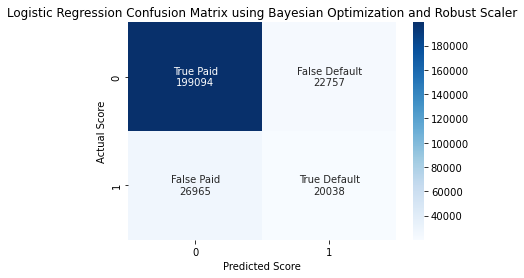

In [49]:
matrix = createConfusionMatrix(y_test_rs, y_pred, mod_info)

**ROC Curve**

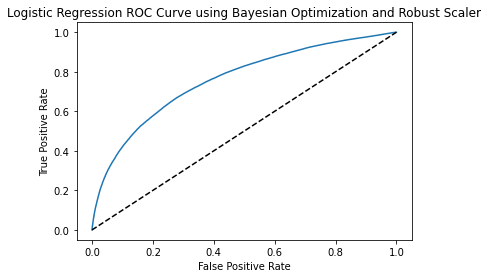

In [50]:
metrics['auc'] = drawRocCurve(lgr_bo_rs_mod1, X_train_rs, X_test_rs, y_train_rs, y_test_rs, mod_info)

In [51]:
print(metrics['auc'])

0.7580226395728477


**Append Results**

In [52]:
model_results, best_model_params = appendModelingResults(model_results, best_model_params, mod_info,
                                                          lgr_bo_rs_params, matrix, metrics)

## 8. Save Model Results

In [53]:
mr_df = pd.DataFrame(model_results)
mr_df.head()
mr_df.to_csv('./results/model_results.csv', index=False, encoding='utf-8');

In [54]:
with open('./results/best_params.json', 'w') as outfile:
    json.dump(best_model_params, outfile, indent=4)